In [1]:
from tokenize import PlainToken
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import matplotlib.pyplot as plt


In [2]:
airpax_data = pd.read_csv("AirPassengers.csv")
airpax_data['Month'] = pd.to_datetime(airpax_data['Month'],infer_datetime_format=True) #convert from string to datetime
airpax_data = airpax_data.set_index(['Month'])
airpax_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


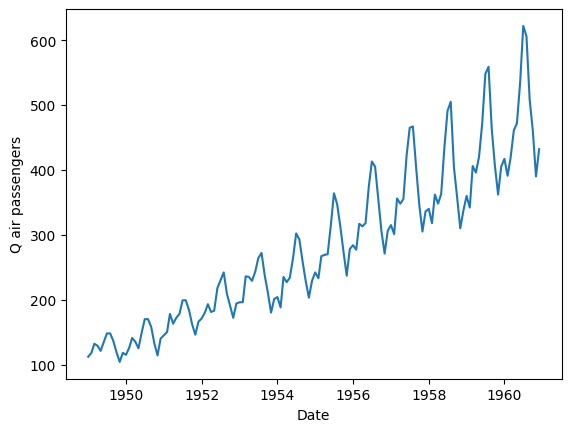

In [3]:
## plot graph
plt.xlabel('Date')
plt.ylabel('Q air passengers')
plt.plot(airpax_data)

Seasonal descomposition

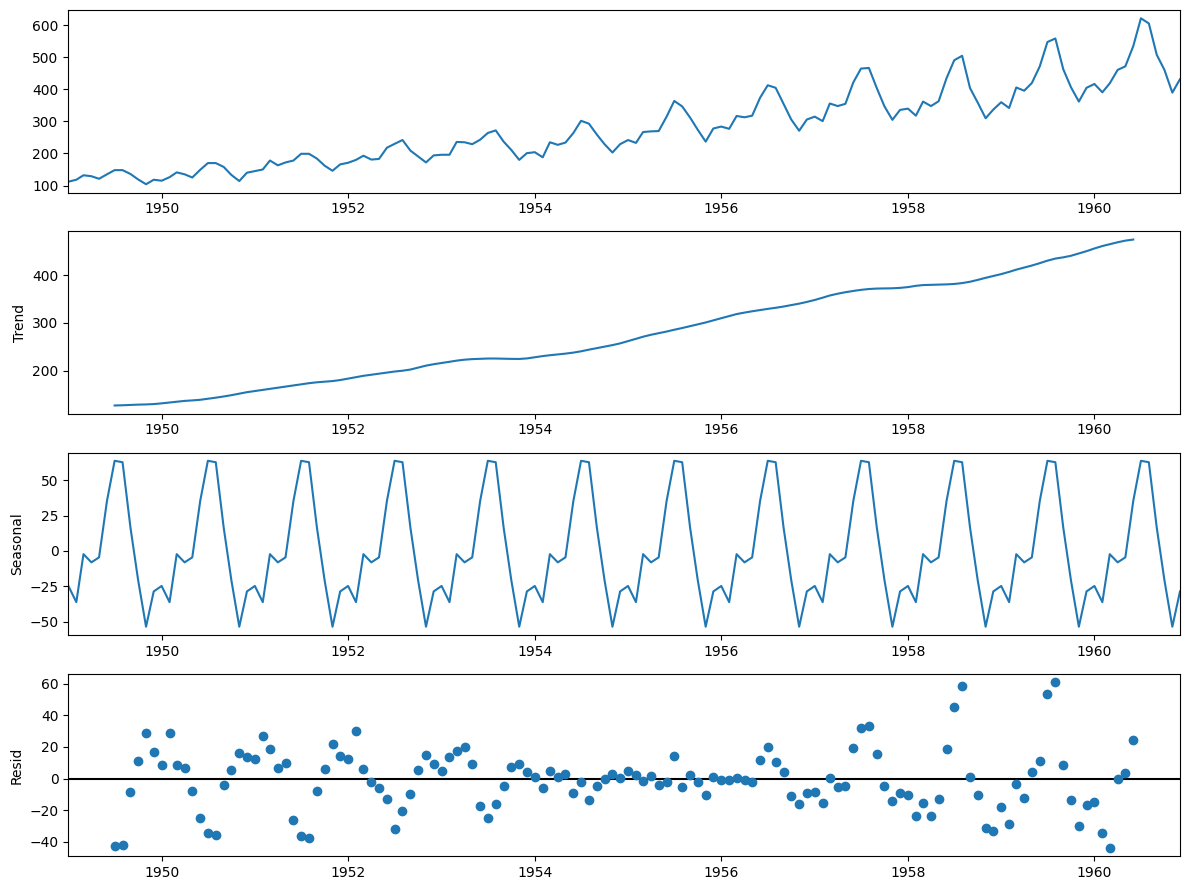

In [4]:
decomp_viz = seasonal_decompose(airpax_data,model='additive', period=12)
fig = decomp_viz.plot()
fig.set_size_inches((12, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

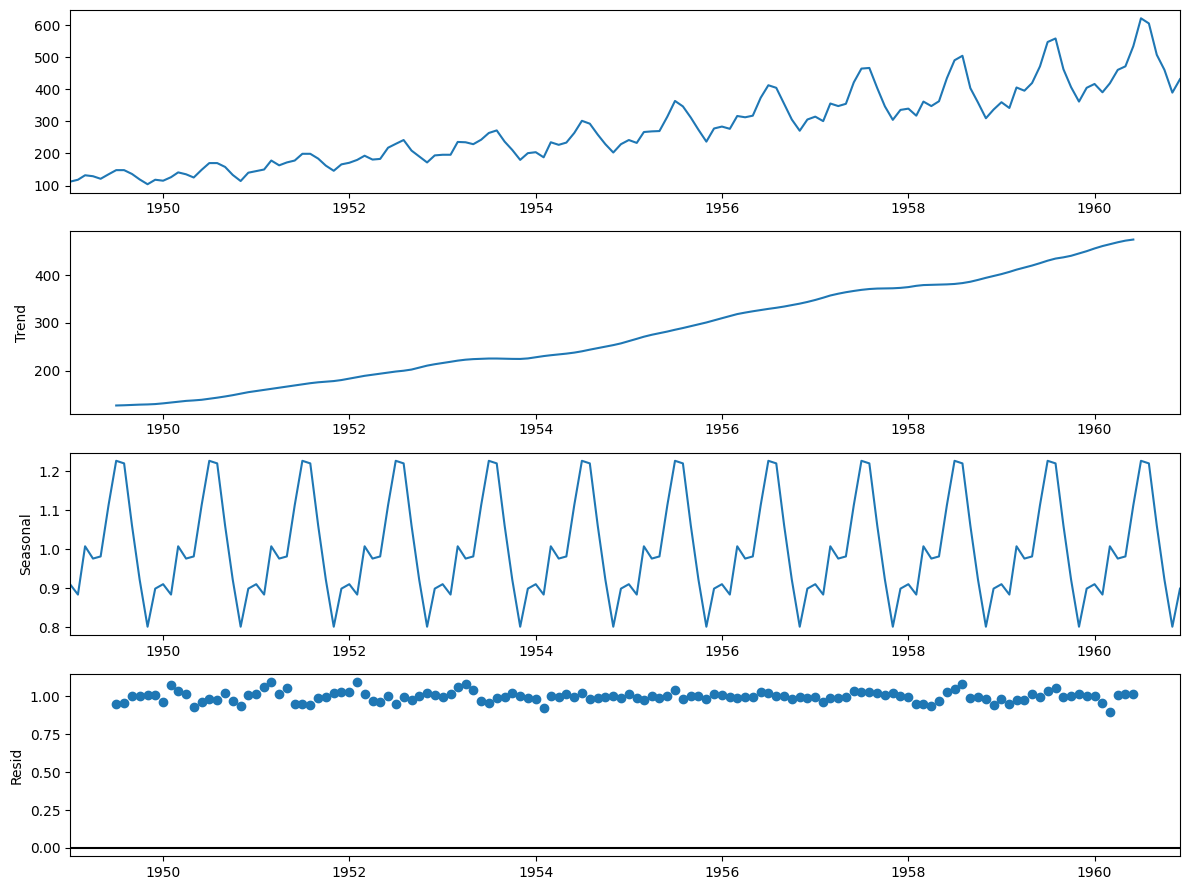

In [5]:
decomp_viz = seasonal_decompose(airpax_data,model='multiplicative', period=12)
fig = decomp_viz.plot()
fig.set_size_inches((12, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

Simple exponencial smoothing (SES)

c:\Users\sarud\.pyenv\stats\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot: title={'center': 'Single Exponential Smoothing'}, xlabel='Month'>

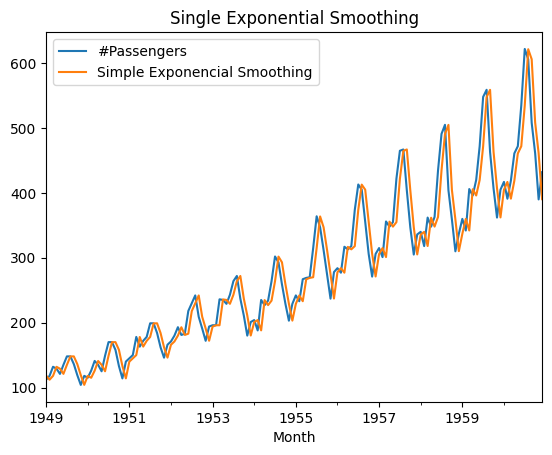

In [6]:
HWES1 = SimpleExpSmoothing(airpax_data, initialization_method="estimated").fit()
HWES1_fitted = HWES1.fittedvalues
HWES1_fitted.name = 'Simple Exponencial Smoothing'
pd.concat([airpax_data, HWES1_fitted], axis=1).plot(title='Single Exponential Smoothing')

In [7]:
results = pd.DataFrame(
    index=["SSE", "AIC", "BIC"])
results["Simple Exponencial"] = [HWES1.sse] + [HWES1.aic] + [HWES1.bic] 

In [8]:
print(HWES1.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:            #Passengers   No. Observations:                  144
Model:             SimpleExpSmoothing   SSE                         163044.779
Optimized:                       True   AIC                           1016.603
Trend:                           None   BIC                           1022.543
Seasonal:                        None   AICC                          1016.891
Seasonal Periods:                None   Date:                 Sat, 01 Oct 2022
Box-Cox:                        False   Time:                         14:51:27
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
initial_level              118.46667                

Double exponencial smoothing (DES)

c:\Users\sarud\.pyenv\stats\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sarud\.pyenv\stats\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


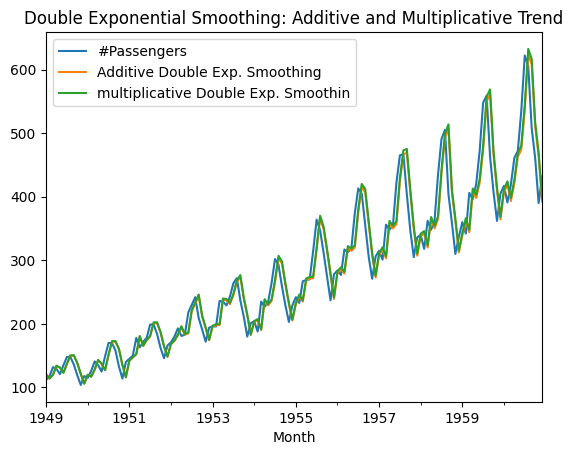

In [9]:
HWES2_ADD = ExponentialSmoothing(airpax_data,trend='add').fit()#.fittedvalues
HWES2_MUL = ExponentialSmoothing(airpax_data,trend='mul').fit()#.fittedvalues
HWES2_ADD_fitted = HWES2_ADD.fittedvalues
HWES2_MUL_fitted = HWES2_MUL.fittedvalues
HWES2_ADD_fitted.name = 'Additive Double Exp. Smoothing'
HWES2_MUL_fitted.name = 'multiplicative Double Exp. Smoothin'
pd.concat([airpax_data, HWES2_ADD_fitted, HWES2_MUL_fitted], axis=1).plot(title='Double Exponential Smoothing: Additive and Multiplicative Trend');

In [10]:
results["Double Exp. - Additive"] = [HWES2_ADD.sse] + [HWES2_ADD.aic] + [HWES2_ADD.bic] 
results["Double Exp. - Multiplicative"] = [HWES2_MUL.sse] + [HWES2_MUL.aic] + [HWES2_MUL.bic] 

Triple exponencial smoothing (TES)

c:\Users\sarud\.pyenv\stats\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sarud\.pyenv\stats\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sarud\.pyenv\stats\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


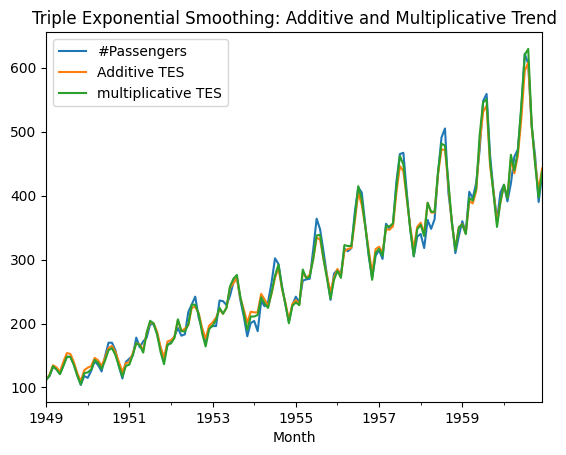

In [11]:
HWES3_ADD = ExponentialSmoothing(airpax_data,trend='add',seasonal='add',seasonal_periods=12).fit()
HWES3_MUL = ExponentialSmoothing(airpax_data,trend='mul',seasonal='mul',seasonal_periods=12).fit()

HWES3_ADD_fitted = HWES3_ADD.fittedvalues
HWES3_MUL_fitted = HWES3_MUL.fittedvalues
HWES3_ADD_fitted.name = 'Additive TES'
HWES3_MUL_fitted.name = 'multiplicative TES'
pd.concat([airpax_data, HWES3_ADD_fitted, HWES3_MUL_fitted], axis=1).plot(title='Triple Exponential Smoothing: Additive and Multiplicative Trend');

In [12]:
results["Triple Exp. - Additive"] = [HWES3_ADD.sse] + [HWES3_ADD.aic] + [HWES3_ADD.bic] 
results["Triple Exp. - Multiplicative"] = [HWES3_MUL.sse] + [HWES3_MUL.aic] + [HWES3_MUL.bic] 

In [13]:
results

,Simple Exponencial,Double Exp. - Additive,Double Exp. - Multiplicative,Triple Exp. - Additive,Triple Exp. - Multiplicative
SSE,163044.779418,162374.167750,166903.890794,21564.338449,15805.297352
AIC,1016.603228,1020.009727,1023.971858,753.293542,708.553348
BIC,1022.542855,1031.888981,1035.851111,800.810555,756.070361


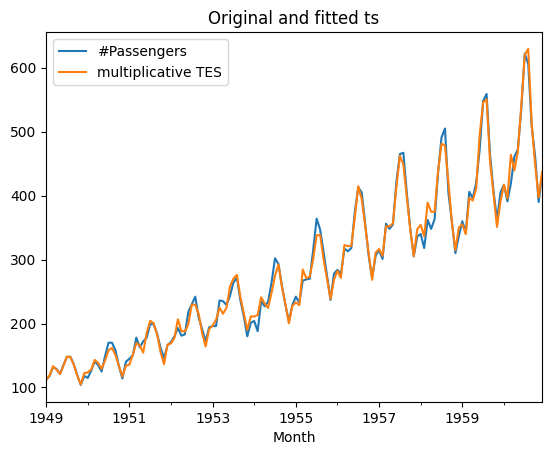

In [14]:
pd.concat([airpax_data, HWES3_MUL_fitted], axis=1).plot(title='Original and fitted ts');

Holt-Winters

In [15]:
fit1 = ExponentialSmoothing(
    airpax_data,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    initialization_method="estimated",
).fit()

fit2 = ExponentialSmoothing(
    airpax_data,
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    initialization_method="estimated",
).fit()

fit3 = ExponentialSmoothing(
    airpax_data,
    seasonal_periods=12,
    trend="mul",
    seasonal="add",
    initialization_method="estimated",
).fit()

fit4 = ExponentialSmoothing(
    airpax_data,
    seasonal_periods=12,
    trend="mul",
    seasonal="mul",
    initialization_method="estimated",
).fit()

c:\Users\sarud\.pyenv\stats\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sarud\.pyenv\stats\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sarud\.pyenv\stats\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sarud\.pyenv\stats\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Users\sarud\.pyenv\stats\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\

In [16]:
results2 = pd.DataFrame(
    index=["SSE", "AIC", "BIC"])

In [17]:
results2["Holt Trend-Add Seas-Add"] = [fit1.sse] + [fit1.aic] + [fit1.bic]
results2["Holt Trend-Add Seas-Mul"] = [fit2.sse] + [fit2.aic] + [fit2.bic]
results2["Holt Trend-Mul Seas-Add"] = [fit3.sse] + [fit3.aic] + [fit3.bic]
results2["Holt Trend-Mul Seas-Mul"] = [fit4.sse] + [fit4.aic] + [fit4.bic]

In [18]:
results2

,Holt Trend-Add Seas-Add,Holt Trend-Add Seas-Mul,Holt Trend-Mul Seas-Add,Holt Trend-Mul Seas-Mul
SSE,21564.338449,15952.889913,21093.180109,15805.297352
AIC,753.293542,709.891805,750.112412,708.553348
BIC,800.810555,757.408818,797.629425,756.070361


Predict

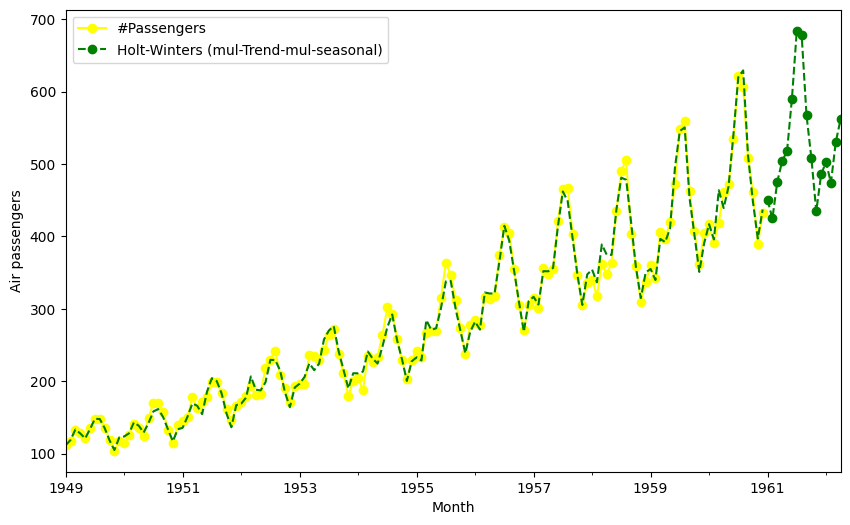

In [19]:
ax = airpax_data.plot(
    figsize=(10, 6),
    marker="o",
    color="yellow",
)

ax.set_ylabel("Air passengers")
ax.set_xlabel("Year")
fit4.fittedvalues.plot(ax=ax, style="--", color="green")
fit4.forecast(16).rename("Holt-Winters (mul-Trend-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)

plt.show()